This examples covers the callable methods of the Python AWIPS DAF when working with gridded data.  We start with a connection to an EDEX server, then query data types, then grid names, parameters, levels, and other information. Finally the gridded data is plotted for its domain using Cartopy and Basemap.

### DataAccessLayer.changeEDEXHost()

After DataAccessLayer is imported from the package `awips.dataaccess`, the first step is to define the EDEX data server hostname (`edex-cloud.unidata.ucar.edu` for these examples)



In [380]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")

### DataAccessLayer.getSupportedDatatypes()

getSupportedDatatypes() returns a list of available data types offered by the EDEX server defined above. 

In [381]:
dataTypes = DataAccessLayer.getSupportedDatatypes()
for type in dataTypes: print type

acars
airep
binlightning
bufrmosavn
bufrmoseta
bufrmosgfs
bufrmoshpc
bufrmoslamp
bufrmosmrf
bufrmosngm
bufrua
climate
common_obs_spatial
ffmp
gfe
grid
hydro
ldadmesonet
maps
modelsounding
obs
pirep
practicewarning
profiler
radar
radar_spatial
satellite
sfcobs
warning


### DataAccessLayer.newDataRequest()

Now create a new data request, and set the data type to **grid** and "locationName" to **RAP40** with **setDataType()** and **setLocationNames()**

In [382]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("RAP40")

### DataAccessLayer.getAvailableParameters()

After datatype and model name (locationName) are set, you can query all available parameters with **getAvailableParameters()**

In [383]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
for parm in availableParms: print parm

AV
BGRUN
BGRUN1hr
BLI
CAPE
CFRZR
CICEP
CIn
CP
CP10hr
CP11hr
CP12hr
CP13hr
CP14hr
CP15hr
CP16hr
CP17hr
CP18hr
CP1hr
CP2hr
CP3hr
CP4hr
CP5hr
CP6hr
CP9hr
CRAIN
CSNOW
DpD
DpT
EPT
GH
HCDC
HINDEX
HPBL
Heli
LCDC
LTNG
LgSP
LgSP10hr
LgSP11hr
LgSP12hr
LgSP13hr
LgSP14hr
LgSP15hr
LgSP16hr
LgSP17hr
LgSP18hr
LgSP1hr
LgSP2hr
LgSP3hr
LgSP4hr
LgSP5hr
LgSP6hr
LgSP9hr
MCDC
MMSP
MSTAV
P
PLPL
PR
PT
PVV
PW
PoT
REFC
REFD
RETOP
RH
SH
SLI
SSRUN
SSRUN1hr
SnD
T
TCC
USTM
VSTM
VUCSH
VVCSH
Vis
WEASD
WEASD1hr
WEASD2hr
WEASD3hr
WGS
uW
vW


### setParameters()


set the request parameter

In [384]:
request.setParameters("T")

### DataAccessLayer.getAvailableLevels()

In [385]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
availableLevels.sort()
for level in availableLevels: print level

60.0_90.0BL
0.0TROP
1000.0MB
0.0SFC
975.0MB
950.0MB
925.0MB
900.0MB
875.0MB
850.0MB
825.0MB
775.0MB
650.0MB
2.0FHAG
80.0FHAG
600.0MB
30.0_60.0BL
90.0_120.0BL
120.0_150.0BL
150.0_180.0BL
800.0MB
750.0MB
725.0MB
700.0MB
0.0_30.0BL
675.0MB
625.0MB
575.0MB
550.0MB
525.0MB
500.0MB
475.0MB
450.0MB
425.0MB
400.0MB
375.0MB
350.0MB
325.0MB
300.0MB
275.0MB
250.0MB
225.0MB
200.0MB
175.0MB
150.0MB
125.0MB
100.0MB


* **0.0SFC** is the Surface level
* **FHAG** stands for Fixed Height Above Ground (in meters)
* **NTAT** stands for Nominal Top of the ATmosphere
* **BL** stands for Boundary Layer, where **0.0_30.0BL** reads as *0-30 mb above ground level*  
* **TROP** is the Tropopause level

### request.setLevels()

For this example we will use Surface Temperature

In [386]:
request.setLevels("0.0SFC")

### DataAccessLayer.getAvailableTimes()

* **getAvailableTimes(request, True)** will return an object of *run times* - formatted as `YYYY-MM-DD HH:MM:SS`
* **getAvailableTimes(request)** will return an object of all times - formatted as `YYYY-MM-DD HH:MM:SS (F:ff)`

In [387]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
print cycles[-1] # 0 for FIRST time, -1 for LAST

2016-05-24 19:00:00


In [388]:
t = DataAccessLayer.getAvailableTimes(request)
for time in t: 
    print str(time)

2016-05-24 12:00:00 (0)
2016-05-24 13:00:00 (0)
2016-05-24 12:00:00 (1)
2016-05-24 14:00:00 (0)
2016-05-24 13:00:00 (1)
2016-05-24 12:00:00 (2)
2016-05-24 15:00:00 (0)
2016-05-24 14:00:00 (1)
2016-05-24 13:00:00 (2)
2016-05-24 12:00:00 (3)
2016-05-24 16:00:00 (0)
2016-05-24 15:00:00 (1)
2016-05-24 14:00:00 (2)
2016-05-24 13:00:00 (3)
2016-05-24 12:00:00 (4)
2016-05-24 17:00:00 (0)
2016-05-24 16:00:00 (1)
2016-05-24 15:00:00 (2)
2016-05-24 14:00:00 (3)
2016-05-24 13:00:00 (4)
2016-05-24 12:00:00 (5)
2016-05-24 18:00:00 (0)
2016-05-24 17:00:00 (1)
2016-05-24 16:00:00 (2)
2016-05-24 15:00:00 (3)
2016-05-24 14:00:00 (4)
2016-05-24 13:00:00 (5)
2016-05-24 12:00:00 (6)
2016-05-24 19:00:00 (0)
2016-05-24 18:00:00 (1)
2016-05-24 17:00:00 (2)
2016-05-24 16:00:00 (3)
2016-05-24 15:00:00 (4)
2016-05-24 14:00:00 (5)
2016-05-24 13:00:00 (6)
2016-05-24 19:00:00 (1)
2016-05-24 18:00:00 (2)
2016-05-24 17:00:00 (3)
2016-05-24 16:00:00 (4)
2016-05-24 15:00:00 (5)
2016-05-24 14:00:00 (6)
2016-05-24 19:00

* note the difference above where the forecast hour () is included in the DataTime object
* also note that the array is sorted by *Validation Time* (2016-05-24 10:00:00 (0), 2016-05-24 11:00:00 (0), 2016-05-24 10:00:00 (1), 2016-05-24 12:00:00 (0), etc.).

### Querying a complete model run

If you want to get all available times (grids) for a particular run, you must supply a DataTime array to the **getGridData()** method which includes all forecast hours.  The DAF does not handle a direct request for a single cycle run (yet), so you need to filter the DataTime array.

In this case we take the `t` object from above (all times) and compare a substring to the last available cycle `cycles[-1]` and append to a new array `fcstRun`.

In [389]:
print "looking for ", str(cycles[-1])

fcstRun = []
for time in t:
    if str(time)[:19] == str(cycles[-1]):
        fcstRun.append(time)

for time in fcstRun: print time

looking for  2016-05-24 19:00:00
2016-05-24 19:00:00 (0)
2016-05-24 19:00:00 (1)
2016-05-24 19:00:00 (2)
2016-05-24 19:00:00 (3)
2016-05-24 19:00:00 (4)
2016-05-24 19:00:00 (5)
2016-05-24 19:00:00 (6)
2016-05-24 19:00:00 (9)
2016-05-24 19:00:00 (10)
2016-05-24 19:00:00 (11)
2016-05-24 19:00:00 (12)
2016-05-24 19:00:00 (13)
2016-05-24 19:00:00 (14)
2016-05-24 19:00:00 (15)
2016-05-24 19:00:00 (16)
2016-05-24 19:00:00 (17)
2016-05-24 19:00:00 (18)


### DataAccessLayer.getGridData()

Now that we have our `request` and DataTime `fcstRun` arrays ready, it's time to request the data array from EDEX.

In [390]:
response = DataAccessLayer.getGridData(request, fcstRun)

**Let's look at what we have**

In [391]:
grid = response[0]

data = grid.getRawData()

print data.shape
print 'Time :', cycles[-1]
print 'Model:', grid.getLocationName()
print 'Parm :', grid.getParameter()
print 'Unit :', grid.getUnit()

(151, 113)
Time : 2016-05-24 19:00:00
Model: RAP40
Parm : T
Unit : K


### getLatLonCoords()

In [392]:
lons,lats = grid.getLatLonCoords()
print lats, lons

[[ 54.24940109  54.35071945  54.45080566 ...,  57.9545517   57.91926193
   57.88272858]
 [ 57.84495163  57.80593109  57.76566696 ...,  58.07667542  58.08861542
   58.09931183]
 [ 58.10876846  58.11697769  58.12394714 ...,  56.40270996  56.46187973
   56.51980972]
 ..., 
 [ 19.93209648  19.89832115  19.86351395 ...,  20.054636    20.06362152
   20.07156372]
 [ 20.0784626   20.08431816  20.08912849 ...,  18.58354759  18.63155174
   18.67854691]
 [ 18.72453308  18.76950836  18.81346893 ...,  17.49624634  17.42861557
   17.36001205]] [[-139.83120728 -139.32348633 -138.81448364 ...,  -79.26060486
   -78.70166016  -78.14326477]
 [ -77.58544922  -77.02822876  -76.47161865 ..., -100.70157623
  -100.13801575  -99.57427216]
 [ -99.01037598  -98.44634247  -97.88218689 ..., -121.69165039
  -121.15060425 -120.60871887]
 ..., 
 [ -82.65139008  -82.26644897  -81.88170624 ...,  -98.52494049
   -98.13802338  -97.75105286]
 [ -97.36403656  -96.97698212  -96.58989716 ..., -113.07767487
  -112.69831085 -1

### Plotting Gridded Data

What happens if we try to plot our data array with Basemap?

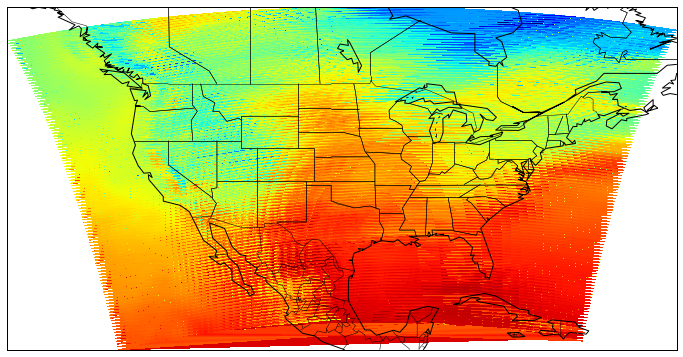

In [393]:
%matplotlib inline
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from numpy import linspace, transpose
from numpy import meshgrid

fig = plt.figure(figsize=(12, 12), dpi=100)
m = Basemap(projection='cyl',
          resolution = 'c',
          llcrnrlon = lons.min(), llcrnrlat = lats.min(),
          urcrnrlon =lons.max(), urcrnrlat = lats.max())
m.drawcoastlines()
m.drawstates()
m.drawcountries()

cs = m.pcolormesh( lons, lats, data, shading='flat', latlon=True, 
                  vmin=data.min(), vmax=data.max())
plt.show()

That looks awful.   The data points are irregularly spaced and must be interpolated onto a regular in order to be displayed.  

**And how about with contourf?**

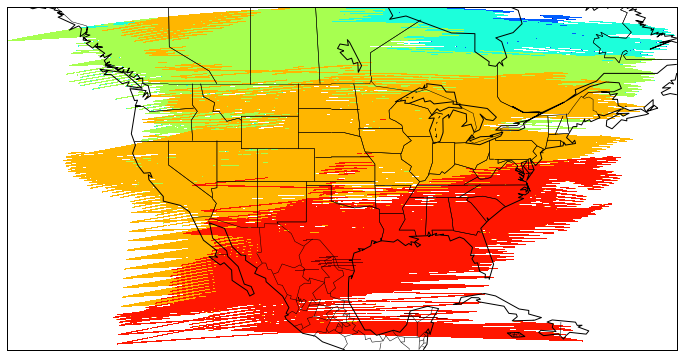

In [394]:
fig = plt.figure(figsize=(12, 12), dpi=100)
m = Basemap(projection='cyl',
          resolution = 'c',
          llcrnrlon = lons.min(), llcrnrlat = lats.min(),
          urcrnrlon =lons.max(), urcrnrlat = lats.max())
m.drawcoastlines()
m.drawstates()
m.drawcountries()

cs = m.contourf( lons, lats, data, shading='flat', latlon=True, 
                  vmin=data.min(), vmax=data.max())
plt.show()

Doesn't look any better here.

So now let's interpolate.

### Plotting an interpolated grid with Basemap

Because the grid is irregularly spaced (grid x/y does not correspond to lat/lon since the grid has a native projection - notice the boundary curvature in the following Mercator-projected plots), the data and lat/lon must be interpolated onto a regular grid using **`mtri.LinearTriInterpolator()`**. 

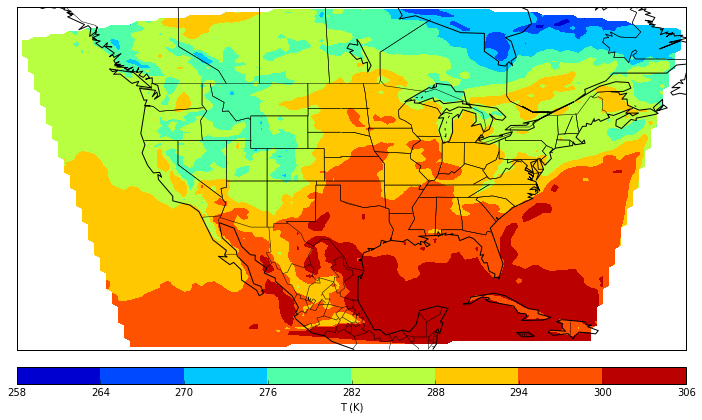

In [395]:
plt.figure(figsize=(12, 12), dpi=100)
map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])
xx, yy = meshgrid(x, y)
ngrid = len(x)
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
          ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
          ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
          lats.flatten()), data.flatten())
rdata = tli(rlons, rlats)

cs = map.contourf(rlons, rlats, rdata, latlon=True, vmin=data.min(), vmax=data.max())
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label(grid.getParameter() + " (" + grid.getUnit() + ")")

plt.show()

**and with pcolormesh**

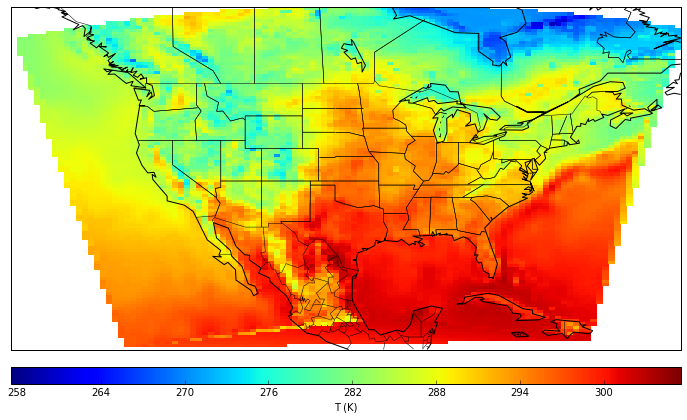

In [396]:
plt.figure(figsize=(12, 12), dpi=100)
map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()

cs = map.pcolormesh(rlons, rlats, rdata, latlon=True, vmin=data.min(), vmax=data.max())
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label(grid.getParameter() + " (" + grid.getUnit() + ")")

plt.show()

### Plotting an interpolated grid with Cartopy

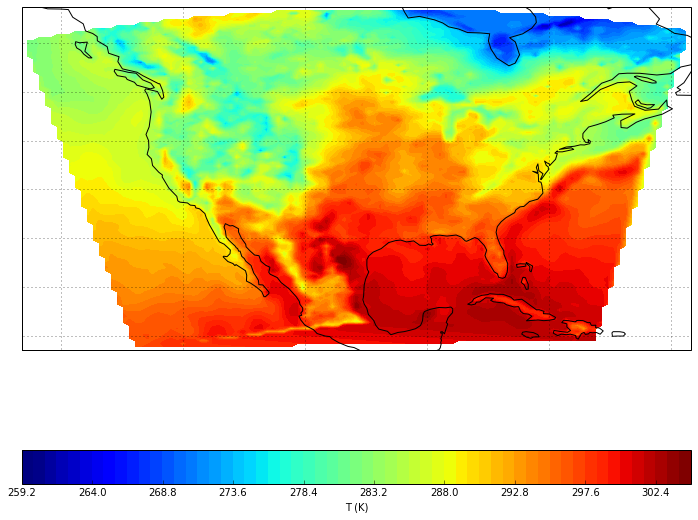

In [397]:
plt.figure(figsize=(12, 12), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
cs = plt.contourf(rlons, rlats, rdata, 60, 
                  transform=ccrs.PlateCarree(), 
                  vmin=rdata.min(), vmax=rdata.max())
ax.gridlines()
ax.coastlines()

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(grid.getParameter() + " (" + grid.getUnit() + ")")
plt.show()